Note book to check fMRI signal from pre-processed fmriprep output

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
from nilearn import image as nimg
from nilearn import plotting as nplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import decouple 
import os
import glob

In [36]:
config = decouple.AutoConfig(' ')
fmriprep_location = config('preprocessed_happy_2')
scans = glob.glob(os.path.join(fmriprep_location, 'sub-*', 'func', '*-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz'))

In [38]:
participant = 'B1001'
img = [scan for scan in scans if participant in scan][0]
func = nimg.load_img(img)
func.shape

(97, 115, 97, 183)

In [39]:
single_vox = func.slicer[32:33, 64:65, 14:15, :].get_fdata()
vox = single_vox.flatten()
vox.shape

(183,)

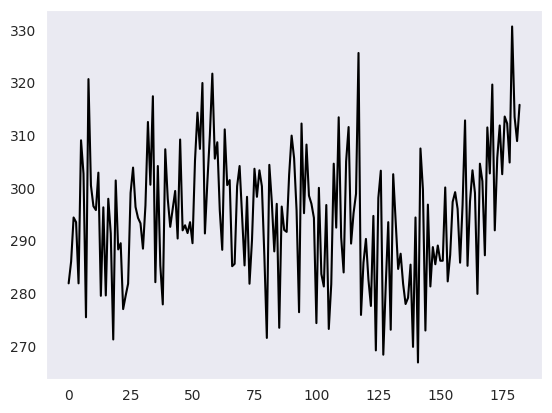

In [28]:
x_axis = np.arange(0, vox.shape[0])
plt.plot(x_axis, vox, 'k')

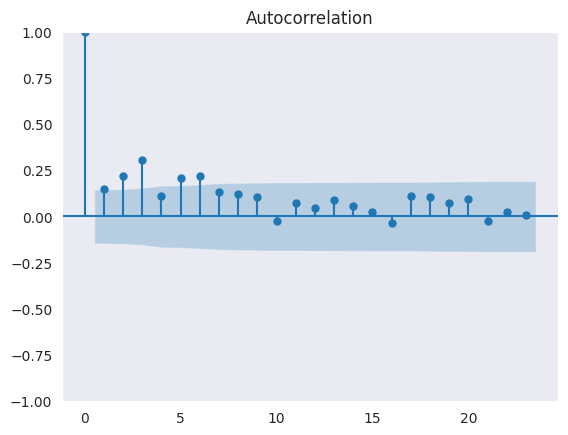

In [29]:
plot_acf(vox)
plt.show()

/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


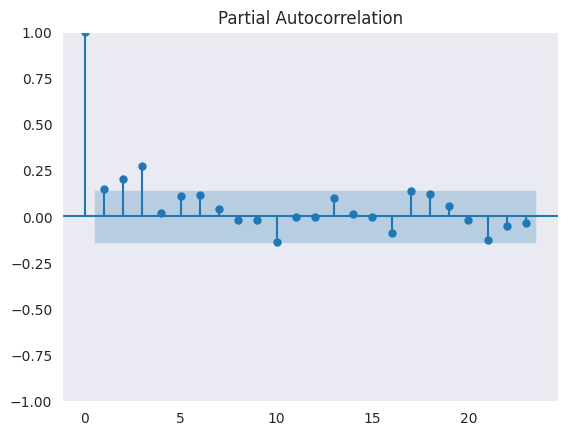

In [30]:
plot_pacf(vox)
plt.show()